In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [2]:
import cv2
import os

def crea_timelapse(directory_input, directory_output, nome_output="timelapse.avi", fps=3):
    immagini = []

    # Ordina i file da t1.png a t14.png
    for i in range(32, 61):
        nome_file = f"time{i}.png"
        percorso_file = os.path.join(directory_input, nome_file)

        if os.path.exists(percorso_file):
            img = cv2.imread(percorso_file)
            if img is not None:
                immagini.append(img)
            else:
                print(f"Immagine non valida: {nome_file}")
        else:
            print(f"File non trovato: {nome_file}")

    if not immagini:
        print("Nessuna immagine valida trovata.")
        return

    # Ottieni dimensioni immagine
    altezza, larghezza, _ = immagini[0].shape

    # Crea VideoWriter
    if not os.path.exists(directory_output):
        os.makedirs(directory_output)

    percorso_output = os.path.join(directory_output, nome_output)
    out = cv2.VideoWriter(percorso_output, cv2.VideoWriter_fourcc(*'XVID'), fps, (larghezza, altezza))

    # Scrivi le immagini nel video
    for img in immagini:
        out.write(img)

    out.release()
    print(f"Timelapse salvato in: {percorso_output}")

# ESEMPIO DI UTILIZZO:
crea_timelapse("H:/PROJECTS-03/Agnese/#aaa/tracking example/modified/", "H:/PROJECTS-03/Agnese/#aaa/tracking example/modified/", fps=3)

Timelapse salvato in: H:/PROJECTS-03/Agnese/#aaa/tracking example/modified/timelapse.avi


C:\Users\fronte\AppData\Local\Temp\8\ipykernel_28124\965318932.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_values = df.groupby("stage")["n"].mean()
C:\Users\fronte\AppData\Local\Temp\8\ipykernel_28124\965318932.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="stage", y="n", palette=violin_colors, inner="box", alpha=0.7)


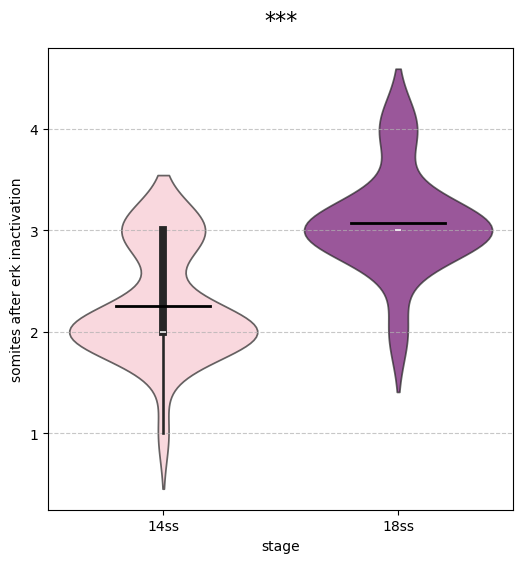

Plot saved at: E:/Agnese/20250219_loopingxh2b_moderk_memcer/early_late\violin_plot_with_boxplot_and_mean.svg
Statistical significance: *** (p = 0.00006)


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import scipy.stats as stats

# Load CSV
csv_path = "E:/Agnese/20250219_loopingxh2b_moderk_memcer/early_late/early_late.csv"
df = pd.read_csv(csv_path)

# Ensure "stage" is categorical for grouping
df["stage"] = pd.Categorical(df["stage"])

# Compute means for each stage
mean_values = df.groupby("stage")["n"].mean()

# Perform statistical test (e.g., t-test)
group1 = df[df["stage"] == df["stage"].unique()[0]]["n"]
group2 = df[df["stage"] == df["stage"].unique()[1]]["n"]
stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)  # Welch’s t-test

# Define significance level and assign asterisks
if p_value < 0.001:
    significance = "***"  # p < 0.001
elif p_value < 0.01:
    significance = "**"   # p < 0.01
elif p_value < 0.05:
    significance = "*"    # p < 0.05
else:
    significance = "n.s."  # Not significant

# Choose colors for the violin plot
violin_colors = ["pink", "purple"]  # Modify as needed

# Plot
plt.figure(figsize=(6, 6))

# Create the violin plot with a small boxplot inside (instead of gray area)
sns.violinplot(data=df, x="stage", y="n", palette=violin_colors, inner="box", alpha=0.7)
for patch in plt.gca().collections:
    if isinstance(patch, plt.Rectangle):  # Change the box (the inner boxplot)
        patch.set_edgecolor('gray')
        patch.set_linewidth(2)

# Add mean line for each stage
for i, stage in enumerate(mean_values.index):
    plt.plot([i - 0.2, i + 0.2], [mean_values[stage], mean_values[stage]], color="black", lw=2, label="Mean" if i == 0 else "")

# Add significance annotation (asterisk)
plt.text(0.5, max(df["n"]) + 1, significance, ha='center', fontsize=16, color='black')

# Labels and title
plt.xlabel("stage")
plt.ylabel("somites after erk inactivation")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot as TIFF
save_directory = "E:/Agnese/20250219_loopingxh2b_moderk_memcer/early_late"
save_path = os.path.join(save_directory, "violin_plot_with_boxplot_and_mean.svg")
plt.savefig(save_path, format="svg", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

print(f"Plot saved at: {save_path}")
print(f"Statistical significance: {significance} (p = {p_value:.5f})")